In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *
import tqdm


## Let's consider only electron spin and see what's the effect of off-axis magnetic field

First:
1. There is no misalignment
2. In Rotating Frame with Rotating wave approximation

In [141]:
#NV in (0, -1) subspace
Sz = (sigmaz()-qeye(2))*0.5
Sx = sigmax()/2
Sy = sigmay()/2

Om_R = 2*np.pi*10  # MHz
Delta = 2*np.pi*0.05  # MHz

H = Delta*Sz+ Om_R *Sx # Hamiltonian
psi0 = basis(2,0) # initial state
tlist = np.linspace(0, 4*np.pi/Om_R, 5000) # in us: list of times for which the solver should store the state vector
result = mesolve(H, psi0, tlist, [], [])

<IPython.core.display.Javascript object>


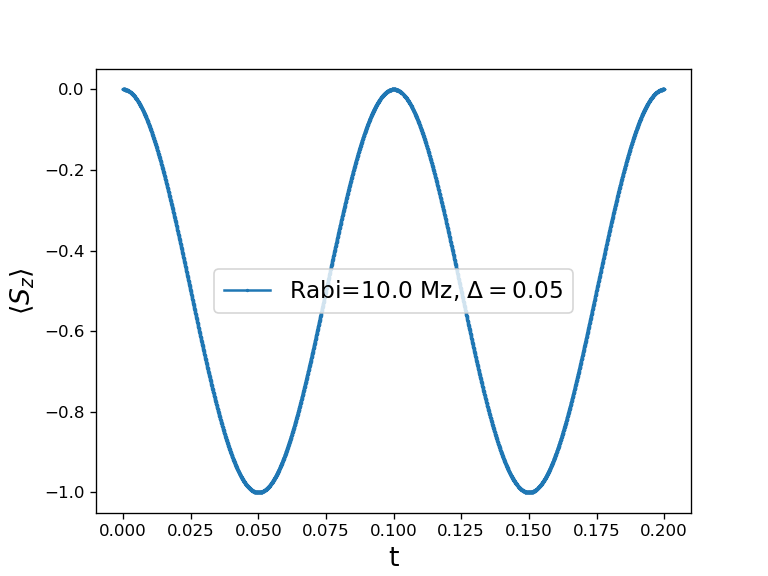

In [142]:
%matplotlib notebook
plt.figure(dpi = 120)
plt.plot(tlist, expect(Sz, result.states),'-o',markersize=1,
         label='Rabi={} Mz,'.format(Om_R/(2*np.pi))+' $\Delta={}$'.format(Delta/(2*np.pi)))
plt.xlabel("t", fontsize=16)
plt.ylabel(r'$\left<S_z\right>$', fontsize=16)
plt.legend(fontsize=14)

# Now we do NOT go to RF and we are in LAB frame

In [171]:
#NV in (0, -1) subspace
Sz = (sigmaz()-qeye(2))/2
Sx = sigmax()
Sy = sigmay()


Om_R = 2*np.pi*10  # MHz
Delta = 0  # MHz

B = 100 # Gaus
gamma_e = 2.8 #MHz/G
om_z = 2*np.pi*gamma_e*B          # MHz

def H1_coeff(t, args):
    return np.cos(om_z*t) # Hamiltonian
H = [om_z*Sz, [Om_R*Sx ,H1_coeff]]
psi0 = basis(2,0) # initial state
tlist = np.linspace(0, 20*np.pi/Om_R, 5000) # in us: list of times for which the solver should store the state vector
c_ops = [1/0.5 * Sz] # T2*
result = mesolve(H, psi0, tlist, c_ops, [])

<IPython.core.display.Javascript object>


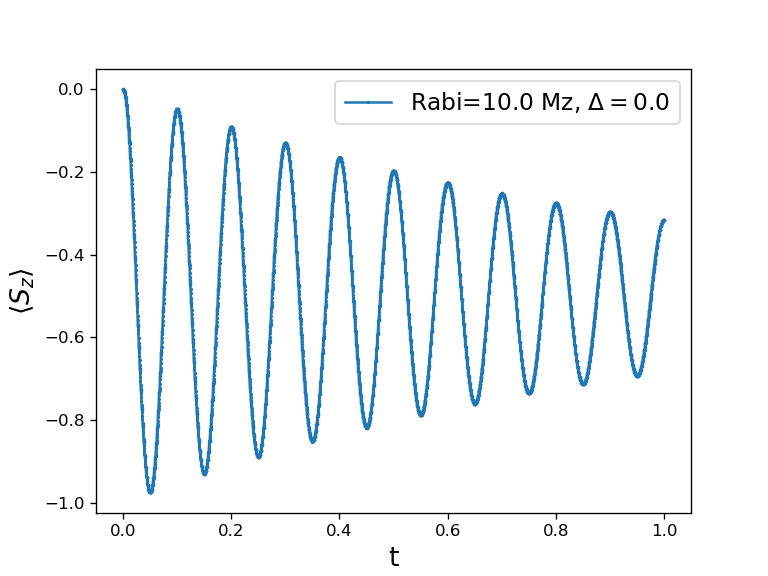

In [172]:
%matplotlib notebook
plt.figure(dpi = 120)
plt.plot(tlist, expect(Sz, result.states),'-o',markersize=1,
         label='Rabi={} Mz,'.format(Om_R/(2*np.pi))+' $\Delta={}$'.format(Delta/(2*np.pi)))
plt.xlabel("t", fontsize=16)
plt.ylabel(r'$\left<S_z\right>$', fontsize=16)
plt.legend(fontsize=14)

## Let's add zero field splitting

In [155]:
#NV in (0, -1) subspace
Sz = (sigmaz()-qeye(2))/2
Sx = sigmax()
Sy = sigmay()


Om_R = 2*np.pi*10  # MHz
Delta = 2*np.pi*5  # MHz
D = 2*np.pi*2.87e3 # MHz
om_MW = -D + om_z - Delta

tet = 0 *np.pi/180 # off-axis angle
phi = 0 *np.pi/180 # off-axis angle phi
B = 100 # Gaus
gamma_e = 2.8 #MHz/G
om_z = 2*np.pi*gamma_e*B*np.cos(tet)             # MHz
om_x = 2*np.pi*gamma_e*B*np.sin(tet)*np.cos(phi) # MHz
om_y = 2*np.pi*gamma_e*B*np.sin(tet)*np.sin(phi) # MHz
om_MW = D - om_z - Delta

def H1_coeff(t, args):
    return np.cos(om_MW*t) # Hamiltonian
H = [D*Sz*Sz+om_z*Sz, [Om_R*Sx ,H1_coeff]]
psi0 = basis(2,0) # initial state
tlist = np.linspace(0, 4*np.pi/Om_R, 5000) # in us: list of times for which the solver should store the state vector
result = mesolve(H, psi0, tlist, [], [])

<IPython.core.display.Javascript object>


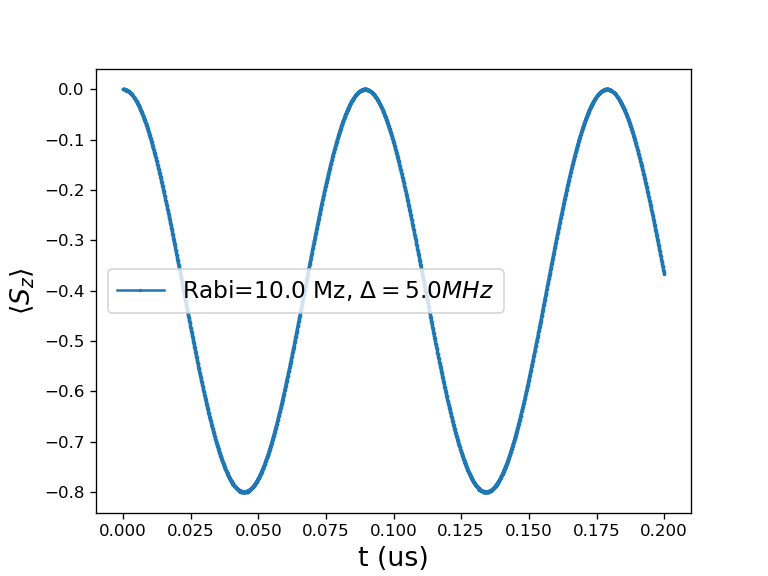

In [156]:
%matplotlib notebook
plt.figure(dpi = 120)
plt.plot(tlist, expect(Sz, result.states),'-o',markersize=1,
         label='Rabi={} Mz,'.format(Om_R/(2*np.pi))+' $\Delta={} MHz$'.format(Delta/(2*np.pi)))
plt.xlabel("t (us)", fontsize=16)
plt.ylabel(r'$\left<S_z\right>$', fontsize=16)
plt.legend(fontsize=14)

## Let's consider misalignment of magnetic field

<IPython.core.display.Javascript object>


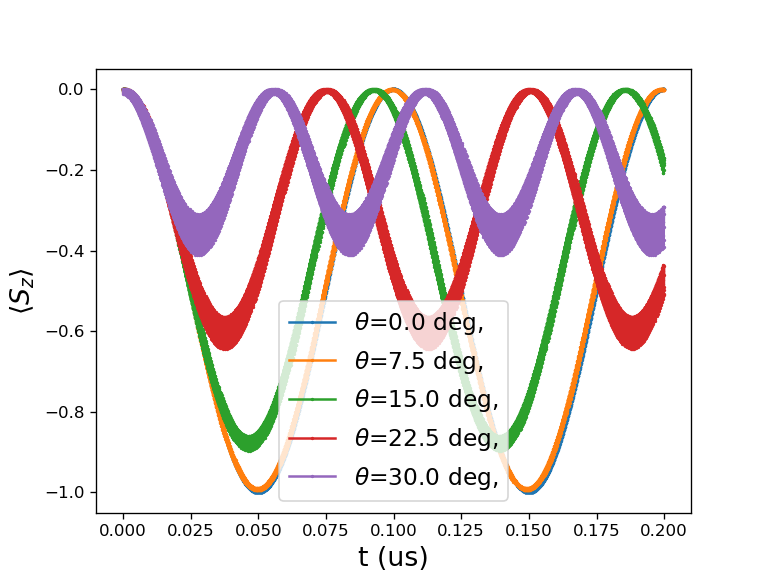

In [166]:
#NV in (0, -1) subspace
Sz = (sigmaz()-qeye(2))/2
Sx = sigmax()
Sy = sigmay()

%matplotlib notebook
plt.figure(dpi = 120)

Om_R = 2*np.pi*10  # MHz
Delta = 2*np.pi*0  # MHz
D = 2*np.pi*2.87e3 # MHz
om_MW = -D + om_z - Delta

Tet = np.linspace(0, 30, 5) *np.pi/180 # off-axis angle
phi = 0 *np.pi/180 # off-axis angle phi
for tet in Tet:
    B = 100 # Gaus
    gamma_e = 2.8 #MHz/G
    om_z = 2*np.pi*gamma_e*B*np.cos(tet)             # MHz
    om_x = 2*np.pi*gamma_e*B*np.sin(tet)*np.cos(phi) # MHz
    om_y = 2*np.pi*gamma_e*B*np.sin(tet)*np.sin(phi) # MHz
    om_MW = D - om_z - Delta

    def H1_coeff(t, args):
        return np.cos(om_MW*t) # Hamiltonian
    H = [D*Sz*Sz+om_z*Sz+om_x*Sx+om_y*Sy, [Om_R*Sx ,H1_coeff]]
    psi0 = basis(2,0) # initial state
    tlist = np.linspace(0, 4*np.pi/Om_R, 5000) # in us: list of times for which the solver should store the state vector
    result = mesolve(H, psi0, tlist, [], [])

    plt.plot(tlist, expect(Sz, result.states),'-o',markersize=1,
             label=r'$\theta$={} deg,'.format(1e-3*(round(1e3*tet*180/np.pi))))
    plt.xlabel("t (us)", fontsize=16)
    plt.ylabel(r'$\left<S_z\right>$', fontsize=16)
    plt.legend(fontsize=14)

In [95]:
2*np.pi/0.1

62.83185307179586